In [1]:
import pandas as pd    #importing necessary libraries
import numpy as np

In [2]:
data = pd.read_csv('DataFrame.csv')      #Reading csv file and creating DataFrame
print(data.shape)
data.head()

(22805, 8)


,Type,Date,Time,open,high,low,close,Unnamed: 7
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,NaN
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,NaN
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,NaN
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,NaN
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,NaN


In [3]:
data.drop('Unnamed: 7' , axis = 1 , inplace = True)   #Dropping unnecessary Column:-> Unnamed: 7

In [4]:
data.rename(columns = str.upper , inplace = True)

In [5]:
data

,TYPE,DATE,TIME,OPEN,HIGH,LOW,CLOSE
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45
...,...,...,...,...,...,...,...
22800,NIFTY,20210331,15:27,14687.35,14694.35,14686.30,14690.60
22801,NIFTY,20210331,15:28,14690.90,14690.90,14686.05,14689.30
22802,NIFTY,20210331,15:29,14690.30,14694.10,14688.55,14691.30
22803,NIFTY,20210331,15:30,14689.85,14693.55,14689.45,14693.05


### CONVERTING STRING INTO DATE TIME SERIES

In [6]:
import datetime
data['DATE'] = pd.to_datetime(data['DATE'] , format = "%Y%m%d")

In [7]:
data.head()

,TYPE,DATE,TIME,OPEN,HIGH,LOW,CLOSE
0,NIFTY,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15
1,NIFTY,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05
2,NIFTY,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70
3,NIFTY,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20
4,NIFTY,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45


In [8]:
#Creating columns like Weekday/Weekname
data["WEEKDAY"]=pd.to_datetime(data["DATE"].astype("str")).dt.weekday
data["DAYNAME"]=pd.to_datetime(data["DATE"].astype("str")).dt.day_name()
year=[]
month=[]
date = []
for i in data['DATE'].astype("str"):
    k=i.strip()
    year.append(k.split("-")[0])
    month.append(k.split("-")[1])
    date.append(k.split("-")[2])

data["YEAR"] = year
data["MONTH"] = month
data["DATES"] = date

In [9]:
time_hr = []
time_min = []

for i in data['TIME']:
    k = i.strip()
    time_hr.append(k.split(":")[0])
    time_min.append(k.split(":")[1])
data["HOUR"] = time_hr
data["MIN"] = time_min

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TYPE     22805 non-null  object        
 1   DATE     22805 non-null  datetime64[ns]
 2   TIME     22805 non-null  object        
 3   OPEN     22805 non-null  float64       
 4   HIGH     22805 non-null  float64       
 5   LOW      22805 non-null  float64       
 6   CLOSE    22805 non-null  float64       
 7   WEEKDAY  22805 non-null  int64         
 8   DAYNAME  22805 non-null  object        
 9   YEAR     22805 non-null  object        
 10  MONTH    22805 non-null  object        
 11  DATES    22805 non-null  object        
 12  HOUR     22805 non-null  object        
 13  MIN      22805 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 2.4+ MB


In [11]:
data.isnull().sum()

TYPE       0
DATE       0
TIME       0
OPEN       0
HIGH       0
LOW        0
CLOSE      0
WEEKDAY    0
DAYNAME    0
YEAR       0
MONTH      0
DATES      0
HOUR       0
MIN        0
dtype: int64

In [12]:
data.head()

,TYPE,DATE,TIME,OPEN,HIGH,LOW,CLOSE,WEEKDAY,DAYNAME,YEAR,MONTH,DATES,HOUR,MIN
0,NIFTY,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15,4,Friday,2021,01,01,09,16
1,NIFTY,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05,4,Friday,2021,01,01,09,17
2,NIFTY,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70,4,Friday,2021,01,01,09,18
3,NIFTY,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20,4,Friday,2021,01,01,09,19
4,NIFTY,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45,4,Friday,2021,01,01,09,20


In [13]:
# data.drop(columns = ["DATE", "TIME"], inplace = True)

In [14]:
data["WEEKDAY"] = data["WEEKDAY"].astype("int")
data["YEAR"] = data["YEAR"].astype("int")
data["MONTH"] = data["MONTH"].astype("int")
data["DATES"] = data["DATES"].astype("int")
data["HOUR"] = data["HOUR"].astype("int")
data["MIN"] = data["MIN"].astype("int")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TYPE     22805 non-null  object        
 1   DATE     22805 non-null  datetime64[ns]
 2   TIME     22805 non-null  object        
 3   OPEN     22805 non-null  float64       
 4   HIGH     22805 non-null  float64       
 5   LOW      22805 non-null  float64       
 6   CLOSE    22805 non-null  float64       
 7   WEEKDAY  22805 non-null  int32         
 8   DAYNAME  22805 non-null  object        
 9   YEAR     22805 non-null  int32         
 10  MONTH    22805 non-null  int32         
 11  DATES    22805 non-null  int32         
 12  HOUR     22805 non-null  int32         
 13  MIN      22805 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(6), object(3)
memory usage: 1.9+ MB


In [16]:
data.head()

,TYPE,DATE,TIME,OPEN,HIGH,LOW,CLOSE,WEEKDAY,DAYNAME,YEAR,MONTH,DATES,HOUR,MIN
0,NIFTY,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15,4,Friday,2021,1,1,9,16
1,NIFTY,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05,4,Friday,2021,1,1,9,17
2,NIFTY,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70,4,Friday,2021,1,1,9,18
3,NIFTY,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20,4,Friday,2021,1,1,9,19
4,NIFTY,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45,4,Friday,2021,1,1,9,20


<AxesSubplot:>

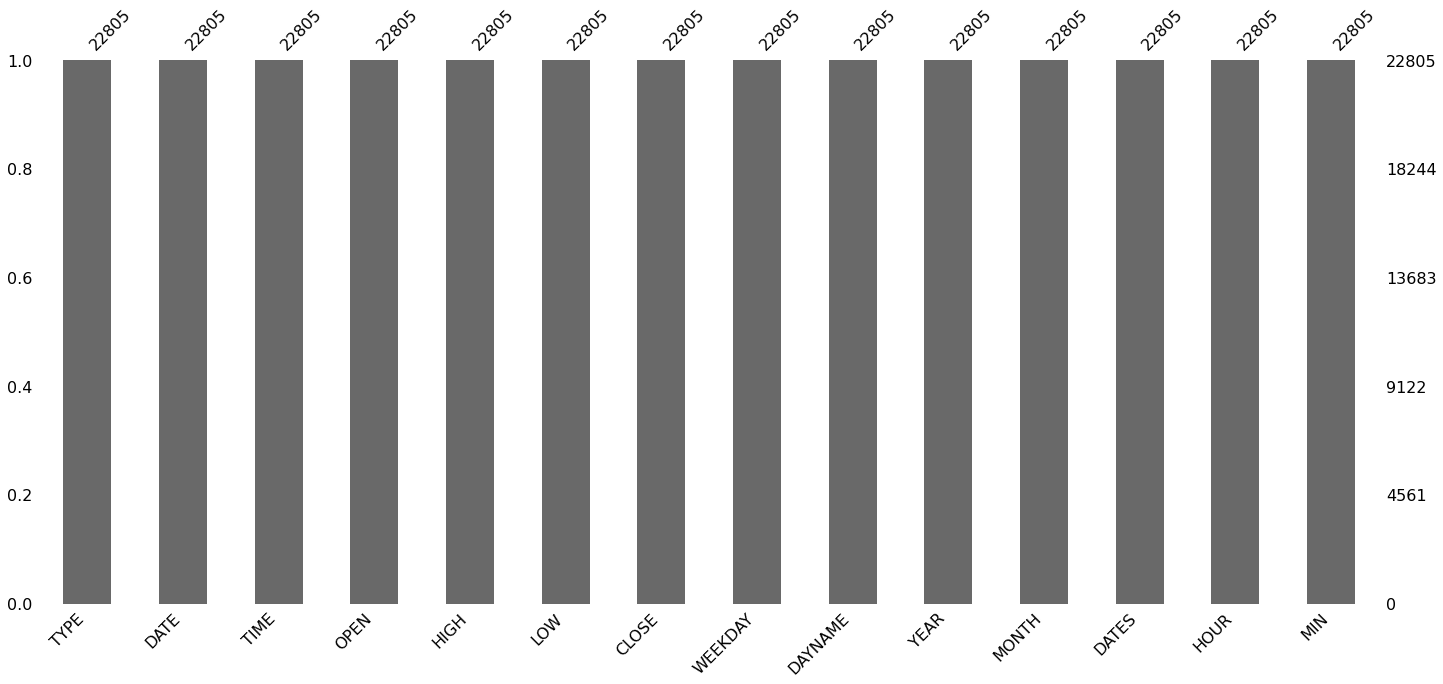

In [17]:
import missingno as msno       #Checking for the missing entries
msno.bar(data)

In [18]:
data.describe()   #Statistics of the Dataset

,OPEN,HIGH,LOW,CLOSE,WEEKDAY,YEAR,MONTH,DATES,HOUR,MIN
count,22805.000000,22805.000000,22805.000000,22805.000000,22805.000000,22805.0,22805.000000,22805.000000,22805.000000,22805.00000
mean,14703.322396,14707.486481,14699.102201,14703.260816,2.016575,2021.0,2.016707,14.573339,11.911072,29.21298
std,391.377498,391.265231,391.551643,391.366248,1.427573,0.0,0.824087,8.543913,1.867000,17.01660
min,13604.750000,13614.400000,13596.750000,13602.800000,0.000000,2021.0,1.000000,1.000000,9.000000,0.00000
25%,14462.250000,14465.950000,14458.050000,14461.950000,1.000000,2021.0,1.000000,8.000000,10.000000,15.00000
50%,14739.500000,14743.000000,14735.850000,14739.450000,2.000000,2021.0,2.000000,15.000000,12.000000,29.00000
75%,15037.000000,15041.250000,15032.500000,15036.850000,3.000000,2021.0,3.000000,22.000000,13.000000,44.00000
max,15429.500000,15431.750000,15427.900000,15430.200000,4.000000,2021.0,3.000000,31.000000,17.000000,59.00000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TYPE     22805 non-null  object        
 1   DATE     22805 non-null  datetime64[ns]
 2   TIME     22805 non-null  object        
 3   OPEN     22805 non-null  float64       
 4   HIGH     22805 non-null  float64       
 5   LOW      22805 non-null  float64       
 6   CLOSE    22805 non-null  float64       
 7   WEEKDAY  22805 non-null  int32         
 8   DAYNAME  22805 non-null  object        
 9   YEAR     22805 non-null  int32         
 10  MONTH    22805 non-null  int32         
 11  DATES    22805 non-null  int32         
 12  HOUR     22805 non-null  int32         
 13  MIN      22805 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(6), object(3)
memory usage: 1.9+ MB


In [20]:
data[data.duplicated()]       #Checking for the duplicated entries

,TYPE,DATE,TIME,OPEN,HIGH,LOW,CLOSE,WEEKDAY,DAYNAME,YEAR,MONTH,DATES,HOUR,MIN


#### CONSIDERING ANOTHER DATASET

In [21]:
df2 = pd.read_csv('MSFT.csv')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [22]:
df2[df2.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [23]:
df2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
mean,34.831233,35.209355,34.449657,34.840895,29.886536,5.953411e+07
std,44.060163,44.513443,43.597704,44.080986,44.195101,3.858121e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07
max,261.660004,263.190002,260.170013,261.970001,261.970001,1.031789e+09


In [24]:
df2.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8857 non-null   object 
 1   Open       8857 non-null   float64
 2   High       8857 non-null   float64
 3   Low        8857 non-null   float64
 4   Close      8857 non-null   float64
 5   Adj Close  8857 non-null   float64
 6   Volume     8857 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 484.5+ KB


In [26]:
df2.value_counts()

Date        Open        High        Low         Close       Adj Close   Volume    
2021-05-03  253.399994  254.350006  251.119995  251.860001  251.860001  19598900      1
1997-11-07  16.257812   16.500000   16.234375   16.445312   10.445252   63628800      1
1997-11-17  16.812500   16.976562   16.679688   16.859375   10.708243   60094400      1
1997-11-14  16.453125   16.734375   16.421875   16.664062   10.584191   46663200      1
1997-11-13  16.257812   16.453125   16.148438   16.445312   10.445252   60094400      1
                                                                                     ..
2009-08-17  23.320000   23.600000   23.230000   23.250000   17.886539   42474400      1
2009-08-18  23.290001   23.650000   23.270000   23.580000   18.242413   38878900      1
2009-08-19  23.250000   23.719999   23.250000   23.650000   18.296562   41821300      1
2009-08-20  23.600000   23.870001   23.540001   23.670000   18.312037   39505900      1
1986-03-13  0.088542    0.101563    0

In [27]:
#Creating columns like Weekday/Weekname
df2["Weekday"]=pd.to_datetime(df2["Date"].astype("str")).dt.weekday
df2["Dayname"]=pd.to_datetime(df2["Date"].astype("str")).dt.day_name()
year=[]
month=[]
date = []
for i in df2['Date'].astype("str"):
    k=i.strip()
    year.append(k.split("-")[0])
    month.append(k.split("-")[1])
    date.append(k.split("-")[2])

df2["Year"] = year
df2["Month"] = month
df2["Dates"] = date

In [28]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Weekday,Dayname,Year,Month,Dates
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,3,Thursday,1986,03,13
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,4,Friday,1986,03,14
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,0,Monday,1986,03,17
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,1,Tuesday,1986,03,18
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,2,Wednesday,1986,03,19


In [29]:
# df2.drop(columns = ["Date"], inplace = True)

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8857 non-null   object 
 1   Open       8857 non-null   float64
 2   High       8857 non-null   float64
 3   Low        8857 non-null   float64
 4   Close      8857 non-null   float64
 5   Adj Close  8857 non-null   float64
 6   Volume     8857 non-null   int64  
 7   Weekday    8857 non-null   int64  
 8   Dayname    8857 non-null   object 
 9   Year       8857 non-null   object 
 10  Month      8857 non-null   object 
 11  Dates      8857 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 830.5+ KB


## EDA PART of DATAFRAME

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

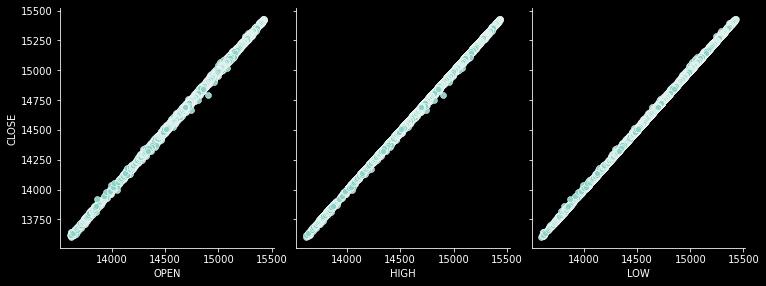

In [32]:
#Finding Correlation between columns

plt.figure(figsize = (10, 5))
sns.pairplot(data, x_vars=['OPEN','HIGH','LOW'], y_vars=["CLOSE"], aspect=0.9, size=4, diag_kind=None)

plt.show()

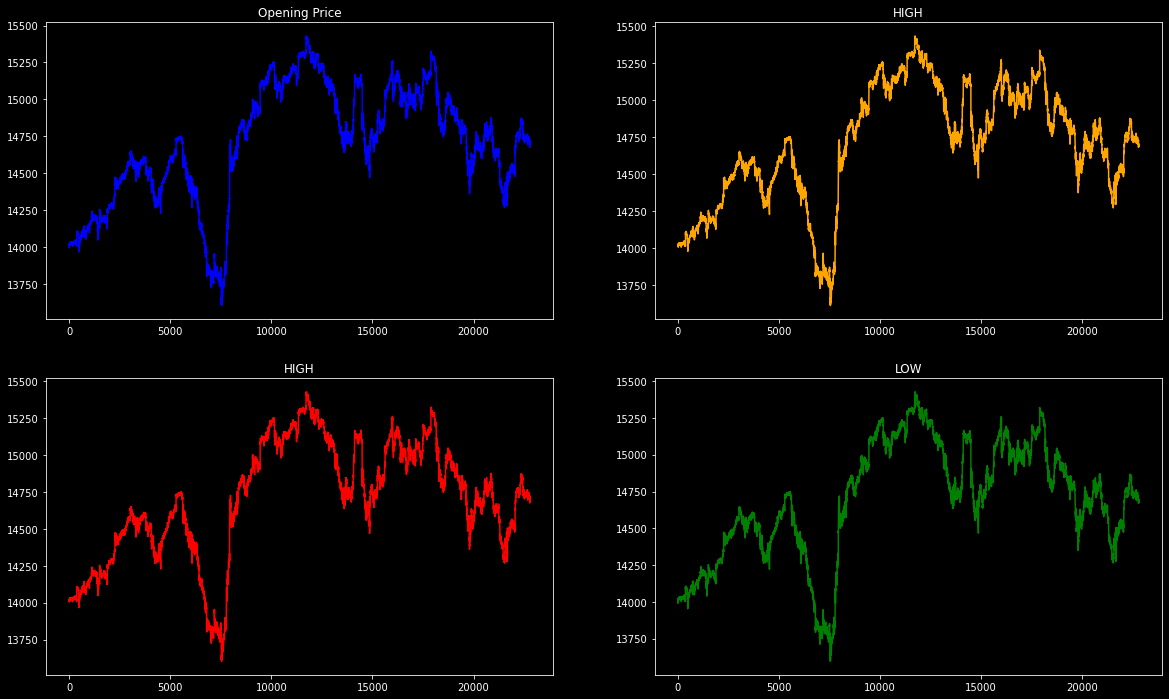

In [33]:
figure, axis = plt.subplots(2, 2,figsize=(20,12))
    
# For Opening Price
axis[0, 0].plot(data['OPEN'],color='b')
axis[0, 0].set_title("Opening Price")
  
# For Closing Price
axis[0, 1].plot(data['HIGH'],color='orange')
axis[0, 1].set_title("HIGH")
  
# For High
axis[1, 0].plot(data['CLOSE'],color='r')
axis[1, 0].set_title("HIGH")
  
# For Low
axis[1, 1].plot(data['LOW'],color='g')
axis[1, 1].set_title("LOW")
  
# Combine all the operations and display
plt.show()

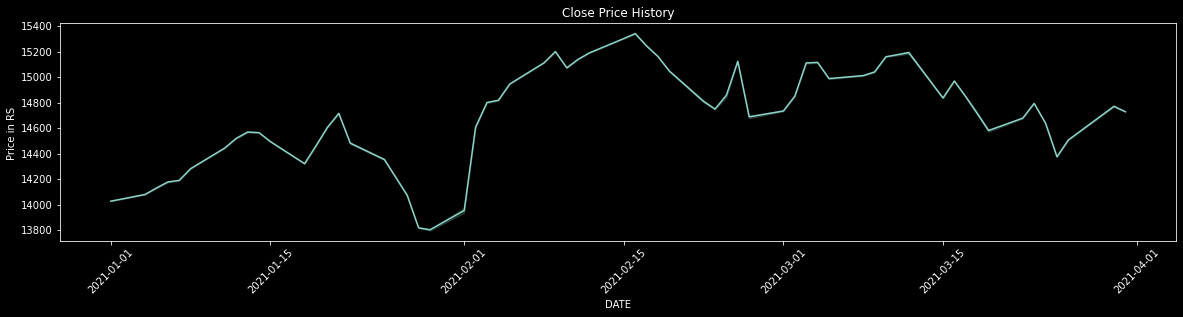

In [34]:
#Visually show the the stock price

plt.figure(figsize=(20,4))
sns.lineplot(x = data["DATE"], y = data["CLOSE"], data = data)
plt.title("Close Price History")
plt.xlabel("DATE")
plt.xticks(rotation=45)
plt.ylabel("Price in RS ")
plt.show()

## EDA PART OF MSFT

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

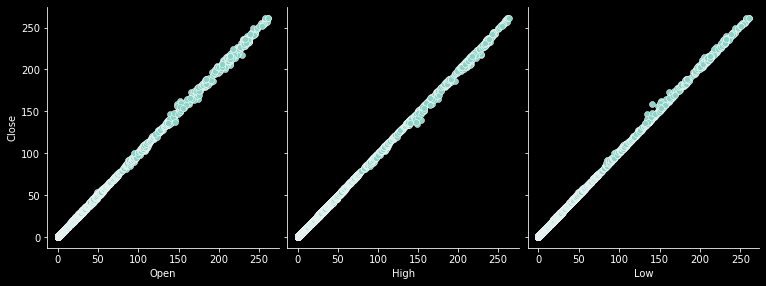

In [35]:
plt.figure(figsize = (10, 5))
sns.pairplot(df2, x_vars=['Open','High','Low'], y_vars=["Close"], aspect=0.9, size=4, diag_kind=None)

plt.show()

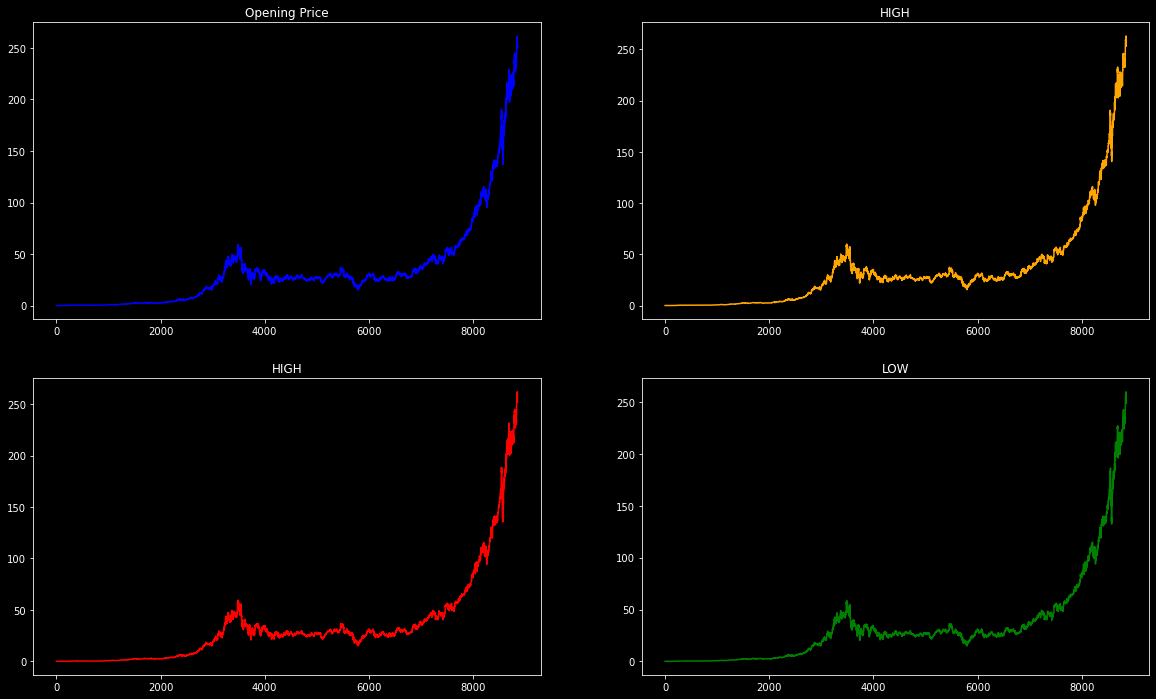

In [36]:
figure, axis = plt.subplots(2, 2,figsize=(20,12))
    
# For Opening Price
axis[0, 0].plot(df2['Open'],color='b')
axis[0, 0].set_title("Opening Price")
  
# For Closing Price
axis[0, 1].plot(df2['High'],color='orange')
axis[0, 1].set_title("HIGH")
  
# For High
axis[1, 0].plot(df2['Close'],color='r')
axis[1, 0].set_title("HIGH")
  
# For Low
axis[1, 1].plot(df2['Low'],color='g')
axis[1, 1].set_title("LOW")
  
# Combine all the operations and display
plt.show()